# 1. Language Detection
There are three languages: A, B and C. Each language uses the same set of symbols: "A, o, e, t, p, g, and k." However, each language uses the symbols differently. In each of these languages we can model everything as P(next symbol | current symbol).

1. There is training data available for each language. This consists of several files each generated by sampling from a Markov model. Using Python, build a Markov model for each of the languages.

2. Now use the Markov model and Bayes' rule to classify the test cases. Write down how you used Bayes' rule to get your classifier. Give the full posterior distribution for each test case.

In [6]:
import pandas as pd
import numpy as np

In [159]:
def read_file(lang, number):
    file = open("/Users/oscarengelbrektson/Downloads/symbol/language-training-lang%s"%lang+"-%d"%number , 'r')
    for line in file: #1 line long documents only
        return line
    
#Load trainsets for each Language, A B C
c_train = [read_file("C", i) for i in range(30)]
b_train = [read_file("B", i) for i in range(30)]
a_train = [read_file("A", i) for i in range(30)]

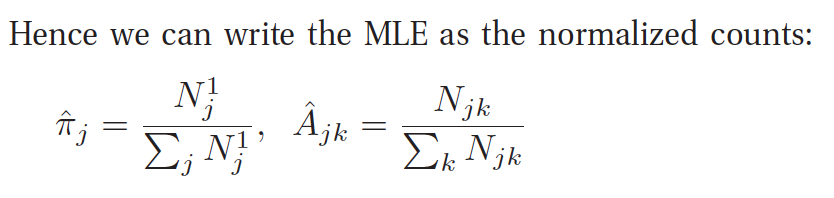

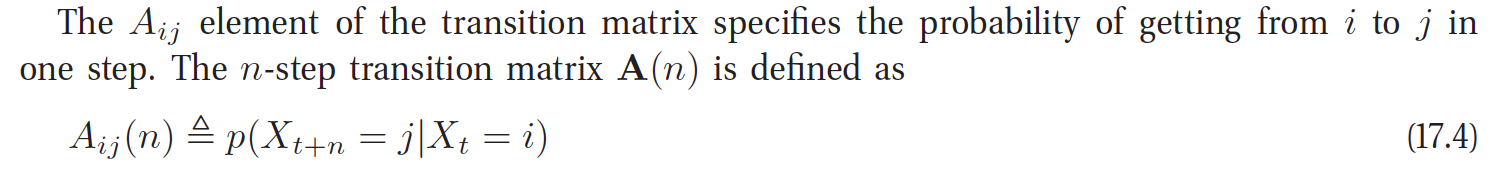

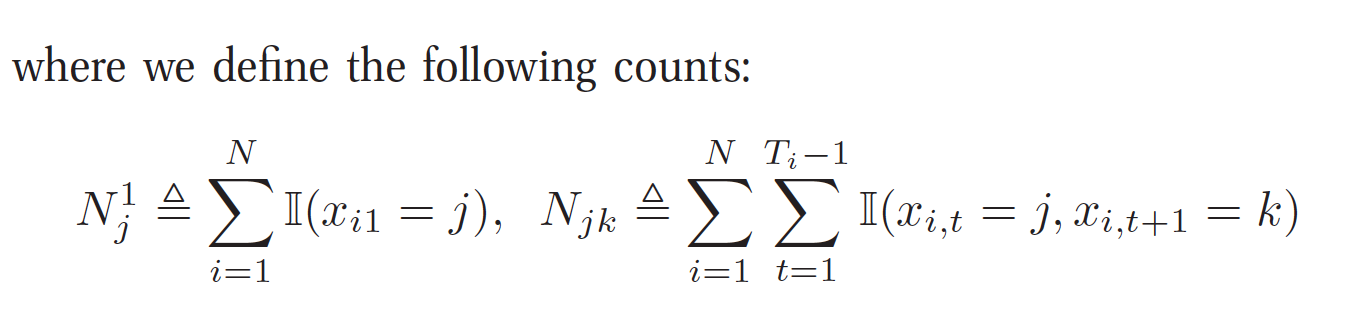

In [118]:
letters = ["A", "o", "e", "t", "p", "g","k"]
letter_index = {letters[x]:x for x in range(len(letters))}

def make_MC(data):
    '''
    The MLE for A_jk is given by N_jk/sum([N_jk in range(0,k)])
    1. make transition matrix A,
    2. Compute N_jk for each index in A, 
    3. Normalize by sum([N_jk in range(0,k)], i.e. the row sum
    '''
    #Initialize Transition matrix
    k = len(letters)
    A = np.zeros(shape=(k, k))
    
    #Compute Counts
    for line in data:
        for i in range(1, len(line)):
            A[letter_index[line[i-1]], letter_index[line[i]]] += 1
        
    #normalize counts by row_count
    for row in range(k):
        row_count = np.sum(A[row,:])

        for column in range(k):
            A[row, column] /= row_count
    
    return A

In [122]:
c_mc = pd.DataFrame(make_MC(c_train))
b_mc = pd.DataFrame(make_MC(b_train))
a_mc = pd.DataFrame(make_MC(a_train))

2. Now use the Markov model and Bayes' rule to classify the test cases. Write down how you used Bayes' rule to get your classifier. Give the full posterior distribution for each test case.

In [123]:
def read_test_file(number):
    file = open("/Users/oscarengelbrektson/Downloads/symbol/language-test-%d"%number , 'r')
    for line in file: #1 line long documents only
        return line
    
#Load trainsets for each Language, A B C
test_cases = [read_test_file(i) for i in range(10)]

In [156]:
def classify(data):
    '''
    Using the likelihood from Bayes's rule
    to compute the P(lang|data)
    classifying as max P(lang|data)
    (as the evidence P(data) is shared between models,
    we do not have to compute it to find the max likelihood language)
    '''
    #Uniform prior over languages
    p_c, p_b, p_a = 1/3, 1/3, 1/3
    
    #Computing the unnormalized posterior for each lang
    for i in range(1, len(data)):
        p_c *= c_mc.loc[letter_index[data[i-1]], letter_index[data[i]]]
        p_b *= b_mc.loc[letter_index[data[i-1]], letter_index[data[i]]]
        p_a *= a_mc.loc[letter_index[data[i-1]], letter_index[data[i]]]
    
    
    #Return the language with the highest likelihood
    probas = {
         p_c :"p_c",
         p_b :"p_b",
         p_a :"p_a"
    }
    return probas[max(probas.keys())]

In [157]:
for case in test_cases:
    print(classify(case))

p_c
p_c
p_a
p_b
p_a
p_a
p_b
p_a
p_c
p_a


# 13.2 Hidden Markov Models

### Speaker Identification
There are three people in a room. Each says about 10 phonemes before being randomly interrupted by someone else. When they speak they all sound the same, however each person tends to use different phonemes in their speech. Specifically, we can model the following transition probabilities that someone will interrupt the current speaker: P(speaker i at time t+1 | speaker j at time t). We can also model the probability over phonemes given a particular speaker: P(phoneme | speaker i). The phonemes are identical to the ones introduced in session 13.1 (but the transition matrices are obviously different, since they take a different form altogether).


1. Write down the update equations that you will need to train a hidden Markov model. Using the information given above, write down a sensible initialization for the transition matrix.
2. Write your own Python code to train a hidden Markov model on the data. You may look at code online, but will need to reference any code that helps you with your implementation.
3. From matplotlib use a stackplot to show the probability of a particular person speaking.

In [7]:
data = "eoggeggAeggepgpppoppogopppgoppoopegAAoAAAtAtttooepooppteeeeotpopppeeoepooopopgoooepoepotpoegogggggkeggpogopopeAtAttAoApAtttAggeAgegettttAAAAtoeeggeteoAopopotoktttpoepegpgtgAgAeeppeoooopgeggpAAAAgAtgegogoeepAtAtAAotAAAtttAtkAAAtAAktAAAtttAtAAoAtteeoopoAoAtoAAtAAApgeoeeeeoeeegteoAopeAkopgpeAgetAeeotAttAAeAAktttkAptAetAttAkAAAttAAkAAAttAAAAgAgkgogppgooApkpoAopopptotegoAppppAgettgtteAtttAAttAtpoooopopkeogeeettgtAAttAtAtttpopptoAokpopooooAooeoopopptoopgpAAootAtgtpgeeeeegegeAkeAgtoAoAooepgeegegeegekeegtoAAttttttggeegkeegggetgggggeggegeAgpoooktoppoopApoooAtAeAgegegoegeAgpeotppogpoppppoppoppoootAtAAAtApopoopooooopopppopoppoottoopopookAtAAAtettApAtttooAAtteeoAttppeAgtpeegoeeAtoAteeAeeppopekotktetppgpkgktopAAtkkgegttAAtoopopkeAApgoAotteegegeogkoggpAggpkAgAttttAAtAttAteeeopoetAttAtkeoAopgtAtktgtgttopooppgopppppppopeooAptoopopAookApoggtpttttoAoppoopAppoAoppooppptpAooppppppoooAAAtttttttAtteegggeeoeegeoeggkettkAAoAkAAteeggggkAgAtpAAAttAtAAAptAeppAAAopppAApkeeokpeegpppekpegeeeteoopoApoookoogggegekopo"

In [16]:
#list(data)


['e', 'o', 'g', 'A', 'p', 't', 'k']

In [77]:
#Implementation of forward and backward algos from Source: https://github.com/adeveloperdiary/HiddenMarkovModel/blob/master/part3/BaumWelch.py

def forward(V, a, b, initial_distribution):
    alpha = np.zeros((V.shape[0], a.shape[0]))
    alpha[0, :] = initial_distribution * b[:, V[0]]

    for t in range(1, V.shape[0]):
        for j in range(a.shape[0]):
            # Matrix Computation Steps
            #                  ((1x2) . (1x2))      *     (1)
            #                        (1)            *     (1)
            alpha[t, j] = alpha[t - 1].dot(a[:, j]) * b[j, V[t]]

    return alpha


def backward(V, a, b):
    beta = np.zeros((V.shape[0], a.shape[0]))

    # setting beta(T) = 1
    beta[V.shape[0] - 1] = np.ones((a.shape[0]))

    # Loop in backward way from T-1 to
    # Due to python indexing the actual loop will be T-2 to 0
    for t in range(V.shape[0] - 2, -1, -1):
        for j in range(a.shape[0]):
            beta[t, j] = (beta[t + 1] * b[:, V[t + 1]]).dot(a[j, :])

    return beta

def make_HMM(data, swapping_interval):
    '''
    Given a string of characters as data,
    3 speakers, and a swapping interval 
    denoting the number of characters spoken before a speaker interrupts,
    returns transition matrices p(phoneme | speaker i) 
    and p(speaker i at time t+1 | speaker j at time t)
    '''
    #Three speakers
    n_speakers = 3
    #Get unique letters in data, map each to a unique number
    letters = np.unique(list(data))
    letter_index = {letters[x]:x for x in range(len(letters))}
    k = len(letters)
    
    #Initialize empty phoneme transition matrix for each speaker
    phoneme_mat = {"speaker_%d"%i:np.zeros(shape=(k,k)) for i in range(1, n_speakers+1)}
    
    #Intitalize 3x3 speaker transition matrix
    #We know that they get interrupted by "someone else"
    #Thus we set the leading diagonal of speaker_mat to 0s
    #uniform prob (0.5) to be interrupted by any other speaker
    speaker_mat = np.full((n_speakers, n_speakers), 1/(n_speakers-1))
    np.fill_diagonal(speaker_mat, np.zeros(n_speakers))
    
    
    
    print(k)
    print(phoneme_mat.keys())
    print(speaker_mat)
    return phoneme_mat
        
    

In [78]:
a = make_HMM(data, 10)

7
dict_keys(['speaker_1', 'speaker_2', 'speaker_3'])
[[0.  0.5 0.5]
 [0.5 0.  0.5]
 [0.5 0.5 0. ]]


In [82]:
#Source: https://github.com/adeveloperdiary/HiddenMarkovModel/blob/master/part3/BaumWelch.py

import pandas as pd
import numpy as np


def forward(V, a, b, initial_distribution):
    alpha = np.zeros((V.shape[0], a.shape[0]))
    alpha[0, :] = initial_distribution * b[:, V[0]]

    for t in range(1, V.shape[0]):
        for j in range(a.shape[0]):
            # Matrix Computation Steps
            #                  ((1x2) . (1x2))      *     (1)
            #                        (1)            *     (1)
            alpha[t, j] = alpha[t - 1].dot(a[:, j]) * b[j, V[t]]

    return alpha


def backward(V, a, b):
    beta = np.zeros((V.shape[0], a.shape[0]))

    # setting beta(T) = 1
    beta[V.shape[0] - 1] = np.ones((a.shape[0]))

    # Loop in backward way from T-1 to
    # Due to python indexing the actual loop will be T-2 to 0
    for t in range(V.shape[0] - 2, -1, -1):
        for j in range(a.shape[0]):
            beta[t, j] = (beta[t + 1] * b[:, V[t + 1]]).dot(a[j, :])

    return beta

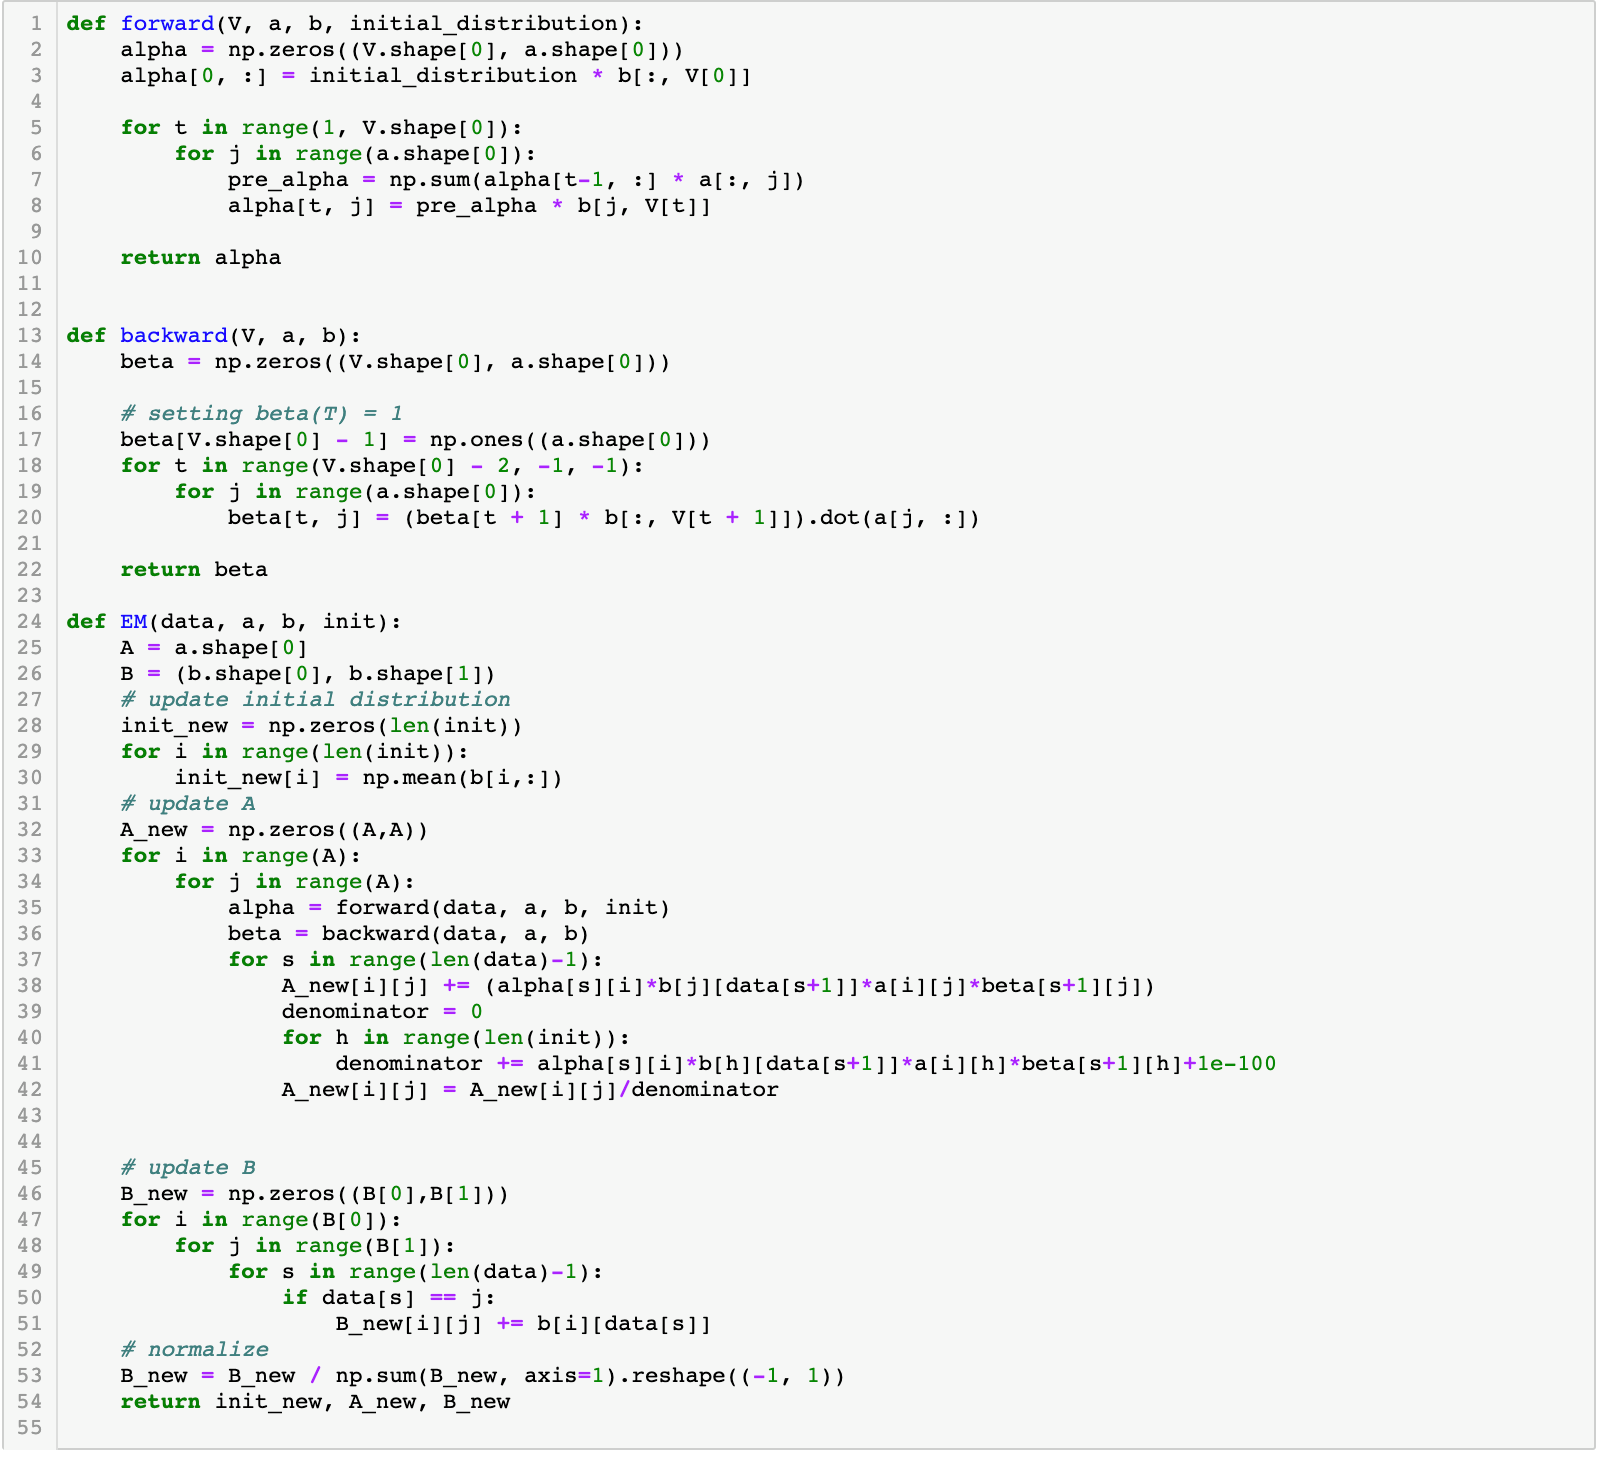

In [85]:
def baum_welch(data, trans_mat, emmision_mat, initial_dist):
    trans_dim = trans_mat.shape[0]
    emission_dim = (emmision_mat.shape[0], emmision_mat.shape[1])
    
    #Initial_dist is N_ij/Sum(N_i) from the emission mat
    new_init = [np.mean(emmision_mat[i,:]) for i in range(len(initial_dist))]
    
    #Update transition matrix
    new_trans = np.zeros(shape=(trans_dim, trans_dim))
    for row in range(trans_dim):
        for col in range(trans_dim):
            alpha = forward(data, trans_mat, emission_mat, initial_dist)
            beta = backward(data, trans_mat, emmision_mat)
            for i in range(len(data)-1):
                new_trans[row, col] += alpha[i][row]*emission_mat[col][data[i+1]]*trans_mat[row, col]*beta[i+1][col]
                
                #initialize normalization constant
                norm = 0
                for j in range(len(initial_dist)):
                    norm += alpha[i][j]*emission_mat[j][data[i+1]]*trans_mat[row, j] * beta[i+1][j]
                
                #normalize entry in new_trans
                new_trans[row, col] /= norm
    
    #Update emission matrix
    new_emission = np.zeros(shape=(emission_dim[0], emission_dim[1]))
    for row in range(emission_dim[0]):
        for col in range(emission_dim[1]):
            for i in range(len(data)-1):
                #indicator function
                if data[i] == col:
                    #Increment count
                    new_emission[row, col] += emission_mat[row, data[i]] 
    
    #Normalize emission matrix by column count
    new_emission /= np.sum(B_new, axis=1).reshape(-1, 1)
    
    return new_init, new_trans, new_emission

In [95]:
#Three speakers
n_speakers = 3

#Intitalize 3x3 speaker transition matrix
#We know that they get interrupted by "someone else"
#Thus we set the leading diagonal of speaker_mat to 0s
#uniform prob (0.5) to be interrupted by any other speaker
speaker_mat = np.full((n_speakers, n_speakers), 1/(n_speakers-1))
np.fill_diagonal(speaker_mat, np.zeros(n_speakers))

#Get unique letters in data, map each to a unique number
letters = np.unique(list(data))
letter_index = {letters[x]:x for x in range(len(letters))}
k = len(letters)

#Initialize emission mat, with uniform probs
emission_mat = np.ones((n_speakers, k)) # k=7 
emission_mat /= np.sum(emission_mat, axis=1).reshape((-1, 1))

#Initalize data into chunks
numerical_data = [letter_index[char] for char in data]
chunked_data = [numerical_data[i:i+1] for i in range(0, len(data), 10)]

# initial dist
initial_dist = np.full(3, 1/3)

for i in range(5):
    initial_dist, speaker_mat, emission_mat = baum_welch(chunked_data, speaker_mat, emision_mat, initial_dist)
    change = 1
    if change < 0.0001:
        break

NameError: name 'emision_mat' is not defined

In [90]:
#Source: https://github.com/adeveloperdiary/HiddenMarkovModel/blob/master/part3/BaumWelch.py

import pandas as pd
import numpy as np


def forward(V, a, b, initial_distribution):
    alpha = np.zeros((V.shape[0], a.shape[0]))
    alpha[0, :] = initial_distribution * b[:, V[0]]

    for t in range(1, V.shape[0]):
        for j in range(a.shape[0]):
            # Matrix Computation Steps
            #                  ((1x2) . (1x2))      *     (1)
            #                        (1)            *     (1)
            alpha[t, j] = alpha[t - 1].dot(a[:, j]) * b[j, V[t]]

    return alpha


def backward(V, a, b):
    beta = np.zeros((V.shape[0], a.shape[0]))

    # setting beta(T) = 1
    beta[V.shape[0] - 1] = np.ones((a.shape[0]))

    # Loop in backward way from T-1 to
    # Due to python indexing the actual loop will be T-2 to 0
    for t in range(V.shape[0] - 2, -1, -1):
        for j in range(a.shape[0]):
            beta[t, j] = (beta[t + 1] * b[:, V[t + 1]]).dot(a[j, :])

    return beta


def baum_welch(V, a, b, initial_distribution, n_iter=100):
    M = a.shape[0]
    T = len(V)

    for n in range(n_iter):
        alpha = forward(V, a, b, initial_distribution)
        beta = backward(V, a, b)

        xi = np.zeros((M, M, T - 1))
        for t in range(T - 1):
            denominator = np.dot(np.dot(alpha[t, :].T, a) * b[:, V[t + 1]].T, beta[t + 1, :])
            for i in range(M):
                numerator = alpha[t, i] * a[i, :] * b[:, V[t + 1]].T * beta[t + 1, :].T
                xi[i, :, t] = numerator / denominator

        gamma = np.sum(xi, axis=1)
        a = np.sum(xi, 2) / np.sum(gamma, axis=1).reshape((-1, 1))

        # Add additional T'th element in gamma
        gamma = np.hstack((gamma, np.sum(xi[:, :, T - 2], axis=0).reshape((-1, 1))))

        K = b.shape[1]
        denominator = np.sum(gamma, axis=1)
        for l in range(K):
            b[:, l] = np.sum(gamma[:, V == l], axis=1)

        b = np.divide(b, denominator.reshape((-1, 1)))

    return {"a":a, "b":b}


data = pd.read_csv('/Users/oscarengelbrektson/Documents/data_python.csv')

V = data['Visible'].values

# Transition Probabilities
a = np.ones((2, 2))
a = a / np.sum(a, axis=1)

# Emission Probabilities
b = np.array(((1, 3, 5), (2, 4, 6)))
b = b / np.sum(b, axis=1).reshape((-1, 1))

# Equal Probabilities for the initial distribution
initial_distribution = np.array((0.5, 0.5))

print(baum_welch(V, a, b, initial_distribution, n_iter=100))

ParserError: Error tokenizing data. C error: Expected 1 fields in line 79, saw 10
